In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import time
from sklearn import preprocessing
from sys import path
path.append(r'E:\data_mining\project\IJCAI-17-口碑\koubei')
import base
import predict

import matplotlib
myfont = matplotlib.font_manager.FontProperties(fname=r'C:/Windows/Fonts/msyh.ttf')
matplotlib.use('qt4agg')  
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
#解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus'] = False

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
#读取user_pay_count
user_pay_counts = base.ReadUserPayCountCSV();
#读取开店时间数据
shop_open_dates = base.ReadShopOpenDateCSV();
###读取商家信息
shop_infos = base.ReadShopInfoCSV();
##读取城市名称对照表
city_names = base.ReadCityNameCSV();
#读取休假表
calenders = base.ReadCalendarCSV();

In [3]:
mean_3_3_3_prediction = pd.read_csv('../data/predict/mean/3_3_3_prediction.txt', sep='\t', index_col=0, encoding='UTF-8')

In [4]:
arima_prediction = pd.read_csv('../data/predict/arima/arima_prediction.txt', sep='\t', index_col=0, encoding='UTF-8')
arima_prediction = predict.FixFinalPredict(arima_prediction)

In [5]:
blend_prediction = pd.read_csv('../data/predict/classify_3/blend_prediction.txt', sep='\t', index_col=0, encoding='UTF-8')

In [6]:
predictions = [mean_3_3_3_prediction, arima_prediction, blend_prediction]
names = ['mean', 'arima','blend']

In [7]:
def plotShopPayCounts(shop_id, date_range, predicts, names, predict_num):
    counts = base.countShopPayTimePeriods(user_pay_counts, shop_id, date_range, [datetime.timedelta(hours=0), datetime.timedelta(hours=23)])
    #counts = base.WipeInvalidUserPayCount(counts)
    counts['holiday'] = calenders.loc[counts.index.strftime('%Y-%m-%d')]['daytype'].values
    info = shop_infos.ix[shop_id]
    weathers = base.readWeatherData(city_names.loc[info['city']])
    counts['weather'] = weathers.loc[counts.index]['desc'].values
    print(counts['count'].values)
    counts = counts.reset_index(drop=True)
    
    train_index = np.array(range(len(counts.index)))
    predict_index = np.array(range(len(counts.index), len(counts.index) + predict_num))
    mean_index = np.array(range(len(counts.index)- 7, len(counts.index)))
    f, (ax) = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(train_index, counts['count'])
    
    temp = counts[counts['holiday'] == 1]
    ax.scatter(temp.index, temp['count'], color='r')
    temp = counts[counts['holiday'] == 2]
    ax.scatter(temp.index, temp['count'], color='g')
    temp = counts[counts['holiday'] == 3]
    ax.scatter(temp.index, temp['count'], color='b')
    temp = counts[counts['holiday'] == 4]
    ax.scatter(temp.index, temp['count'], color='k')
    temp = counts[counts['holiday'] == 5]
    ax.scatter(temp.index, temp['count'], color='y')
    
    for i, name in enumerate(names):
        ax.plot(predict_index, predicts[i].loc[id], label=name)
        #print("%s : %s"%(name, predicts[i].loc[id]))
    
#     ax.text(left, bottom, 'left top',
#         horizontalalignment='left',
#         verticalalignment='top',
#         transform=ax.transAxes)
    
    plt.title(info.cate_1_name + ' ' + info.cate_2_name + ('' if info.cate_3_name is None else info.cate_3_name), fontproperties=myfont)
    mean_value = np.mean(counts['count'][mean_index])
    print('pre_week_mean_value=' + str(mean_value))
    ax.axhline(y=mean_value, linewidth=1, color='r')
    plt.legend()
    plt.show()

In [8]:
diff_prediciton = (mean_3_3_3_prediction.mean(axis=1) - arima_prediction.mean(axis=1))#.sort_values()

In [9]:
def judgeDiffIntersectType(s):
    #不相交 且mean 大于arima
    if len(s[s >= 0]) == 14:
        return 1
    #不相交 且mean 小于arima
    elif len(s[s <= 0]) == 14:
        return 2
    #相交
    else:
        return 0

In [9]:
judgeDiffIntersectType(mean_3_3_3_prediction.loc[742] - arima_prediction.loc[742])

2

In [289]:
diff_prediciton.sort_values().head(50)

825    -187.500000
286    -169.000000
731    -154.142857
1998   -143.285714
742    -141.000000
1571   -134.285714
1350   -129.000000
1145   -119.357143
1881   -103.285714
272    -102.714286
1469    -91.071429
1269    -86.785714
1556    -81.071429
700     -80.928571
501     -80.142857
768     -79.285714
407     -78.000000
1631    -72.642857
428     -69.500000
1116    -65.714286
88      -64.142857
1661    -62.785714
1464    -60.571429
275     -58.428571
23      -57.071429
1620    -55.142857
489     -52.714286
1526    -52.357143
1765    -51.357143
1925    -50.928571
803     -50.500000
1759    -49.428571
1591    -48.000000
1229    -47.428571
1462    -45.928571
1825    -45.142857
835     -43.928571
368     -42.714286
1295    -42.500000
826     -41.928571
1060    -40.571429
571     -38.714286
789     -38.142857
1796    -36.857143
1610    -36.857143
1275    -36.714286
1292    -36.714286
1383    -34.000000
900     -33.500000
1465    -33.000000
dtype: float64

In [11]:
intersect_df[intersect_df != 0]

NameError: name 'intersect_df' is not defined

In [81]:

arima_arr = [742,825,286,272,731,1571,1350,1296,1145,1998,1881,1469,1556,407,501,1631,1269,428,308,142,1116,88,1464,275,1925,23,1462,460,1620,5]

In [ ]:
arima_arr = [742,825,286,272,1350,1296,1145,1998,1881,1469,1556,407,501,1631,1269,428,308,88,275,1925,23,1462,5]
arima_arr2 = [768,489,1526,1765,1591,1229,1825,1295,1060]

In [115]:
i = 0
22 236 253 418 468 473 488 631 699 767 825 1046 1049 1053 1069 1108 1306 1461 1463 1520 1525 1555 1586 1658 1687 1720 1807 1856 1924 1981	1

In [10]:
y_test = pd.read_csv('../data/predict/classify_3/y_test_rf.csv', index_col=0, encoding='UTF-8')

In [12]:
y_test_positive = y_test[y_test['0'] == 0]

In [13]:
y_test_positive

,0
1,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0
11,0


In [14]:
i = 0

In [16]:
id = 1350

16
2016-10-11 00:00:00
[41 49 30 69 63 40 42 58 41 43 57 50 67 38 38 39 48 50 38 38 32]
pre_week_mean_value=40.42857142857143


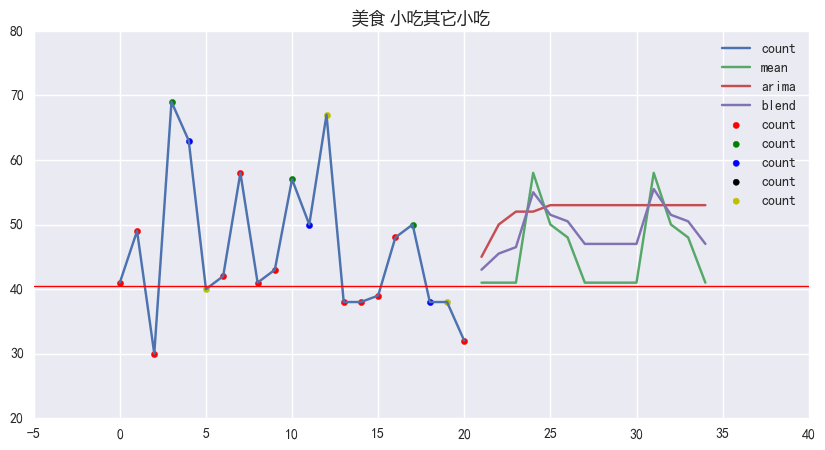

In [29]:
id = y_test_positive.index[i]
i = i + 1
#id = 1966
print(id)
#open_time = shop_open_dates.loc[id]['date'];
open_time = pd.to_datetime('2016-10-11')
start_time = open_time;
end_time = pd.to_datetime('2016-10-31')
print(open_time)
plotShopPayCounts(id, [start_time, end_time], predictions, names, 14)